# **A Machine Learning Approach to Detect Student Dropout at University**

#BY : Echrak Bouafif & Aya Ben Slimene

This project involves replicating and analyzing a research paper that addresses student dropout prediction using machine learning.

This dataset provides a comprehensive view of students enrolled in various undergraduate degrees offered at a higher education institution. It includes demographic data, social-economic factors and academic performance information that can be used to analyze the possible predictors of student dropout and academic success. This dataset contains multiple disjoint databases consisting of relevant information available at the time of enrollment, such as application mode, marital status, course chosen and more. Additionally, this data can be used to estimate overall student performance at the end of each semester by assessing curricular units credited/enrolled/evaluated/approved as well as their respective grades. Finally, we have unemployment rate, inflation rate and GDP from the region which can help us further understand how economic factors play into student dropout rates or academic success outcomes.

About the dataset


This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success

* Marital status: The marital status of the student. (Categorical)
* Application mode: The method of application used by the student. (Categorical)
* Application order: The order in which the student applied. (Numerical)
* Course: The course taken by the student. (Categorical)
* Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
* Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
* Nacionality: The nationality of the student. (Categorical)
* Mother's qualification: The qualification of the student's mother. (Categorical)
* Father's qualification: The qualification of the student's father. (Categorical)
* Mother's occupation: The occupation of the student's mother. (Categorical)
* Father's occupation: The occupation of the student's father. (Categorical)
* Displaced: Whether the student is a displaced person. (Categorical)
* Educational special needs: Whether the student has any special educational needs. (Categorical)
* Debtor: Whether the student is a debtor. (Categorical)
* Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
* Gender: The gender of the student. (Categorical)
* Scholarship holder: Whether the student is a scholarship holder. (Categorical)
* Age at enrollment: The age of the student at the time of enrollment. (Numerical)
* International: Whether the student is an international student. (Categorical)
* Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
* Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
* Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
* Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [143]:
#Upload the DataFrame
df = pd.read_csv('/content/data.csv')
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
4,5,1,39,1,171,1,19,133.1,1,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout


# Step 1: Data Preparation

In [144]:
# Display initial info and structure
print("Initial Data Overview:")
print(df.info())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              61578 non-null  int64  
 1   Marital status                                  61578 non-null  int64  
 2   Application mode                                61578 non-null  int64  
 3   Application order                               61578 non-null  int64  
 4   Course                                          61578 non-null  int64  
 5   Daytime/evening attendance                      61578 non-null  int64  
 6   Previous qualification                          61578 non-null  int64  
 7   Previous qualification (grade)                  61578 non-null  float64
 8   Nacionality                                     61578 non-null  int64  
 9   Mother's qualifi

In [145]:
#print the dimensions of the DataFrame
df.shape

(61578, 38)

In [146]:
#print the columns names of the DataFrame
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [147]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                               

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,61578.0,38271.646189,22083.419418,0.00,19115.25,38312.500000,57312.750000,76517.000
Marital status,61578.0,1.118516,0.451832,1.00,1.00,1.000000,1.000000,6.000
Application mode,61578.0,16.146140,16.673750,1.00,1.00,17.000000,39.000000,53.000
Application order,61578.0,1.675680,1.258984,0.00,1.00,1.000000,2.000000,6.000
Course,61578.0,8954.825197,1925.809939,33.00,9119.00,9254.000000,9670.000000,9991.000
Daytime/evening attendance,61578.0,0.911202,0.284454,0.00,1.00,1.000000,1.000000,1.000
Previous qualification,61578.0,3.639076,8.400165,1.00,1.00,1.000000,1.000000,43.000
Previous qualification (grade),61578.0,132.890601,11.117593,95.00,127.00,133.100000,140.000000,190.000
Nacionality,61578.0,1.225860,3.334185,1.00,1.00,1.000000,1.000000,109.000
Mother's qualification,61578.0,20.118321,15.423290,1.00,1.00,19.000000,37.000000,44.000


# Step2: Data Visualization

In [149]:
num_cols = df.select_dtypes(include=np.number).columns

numerical_data = df[num_cols]

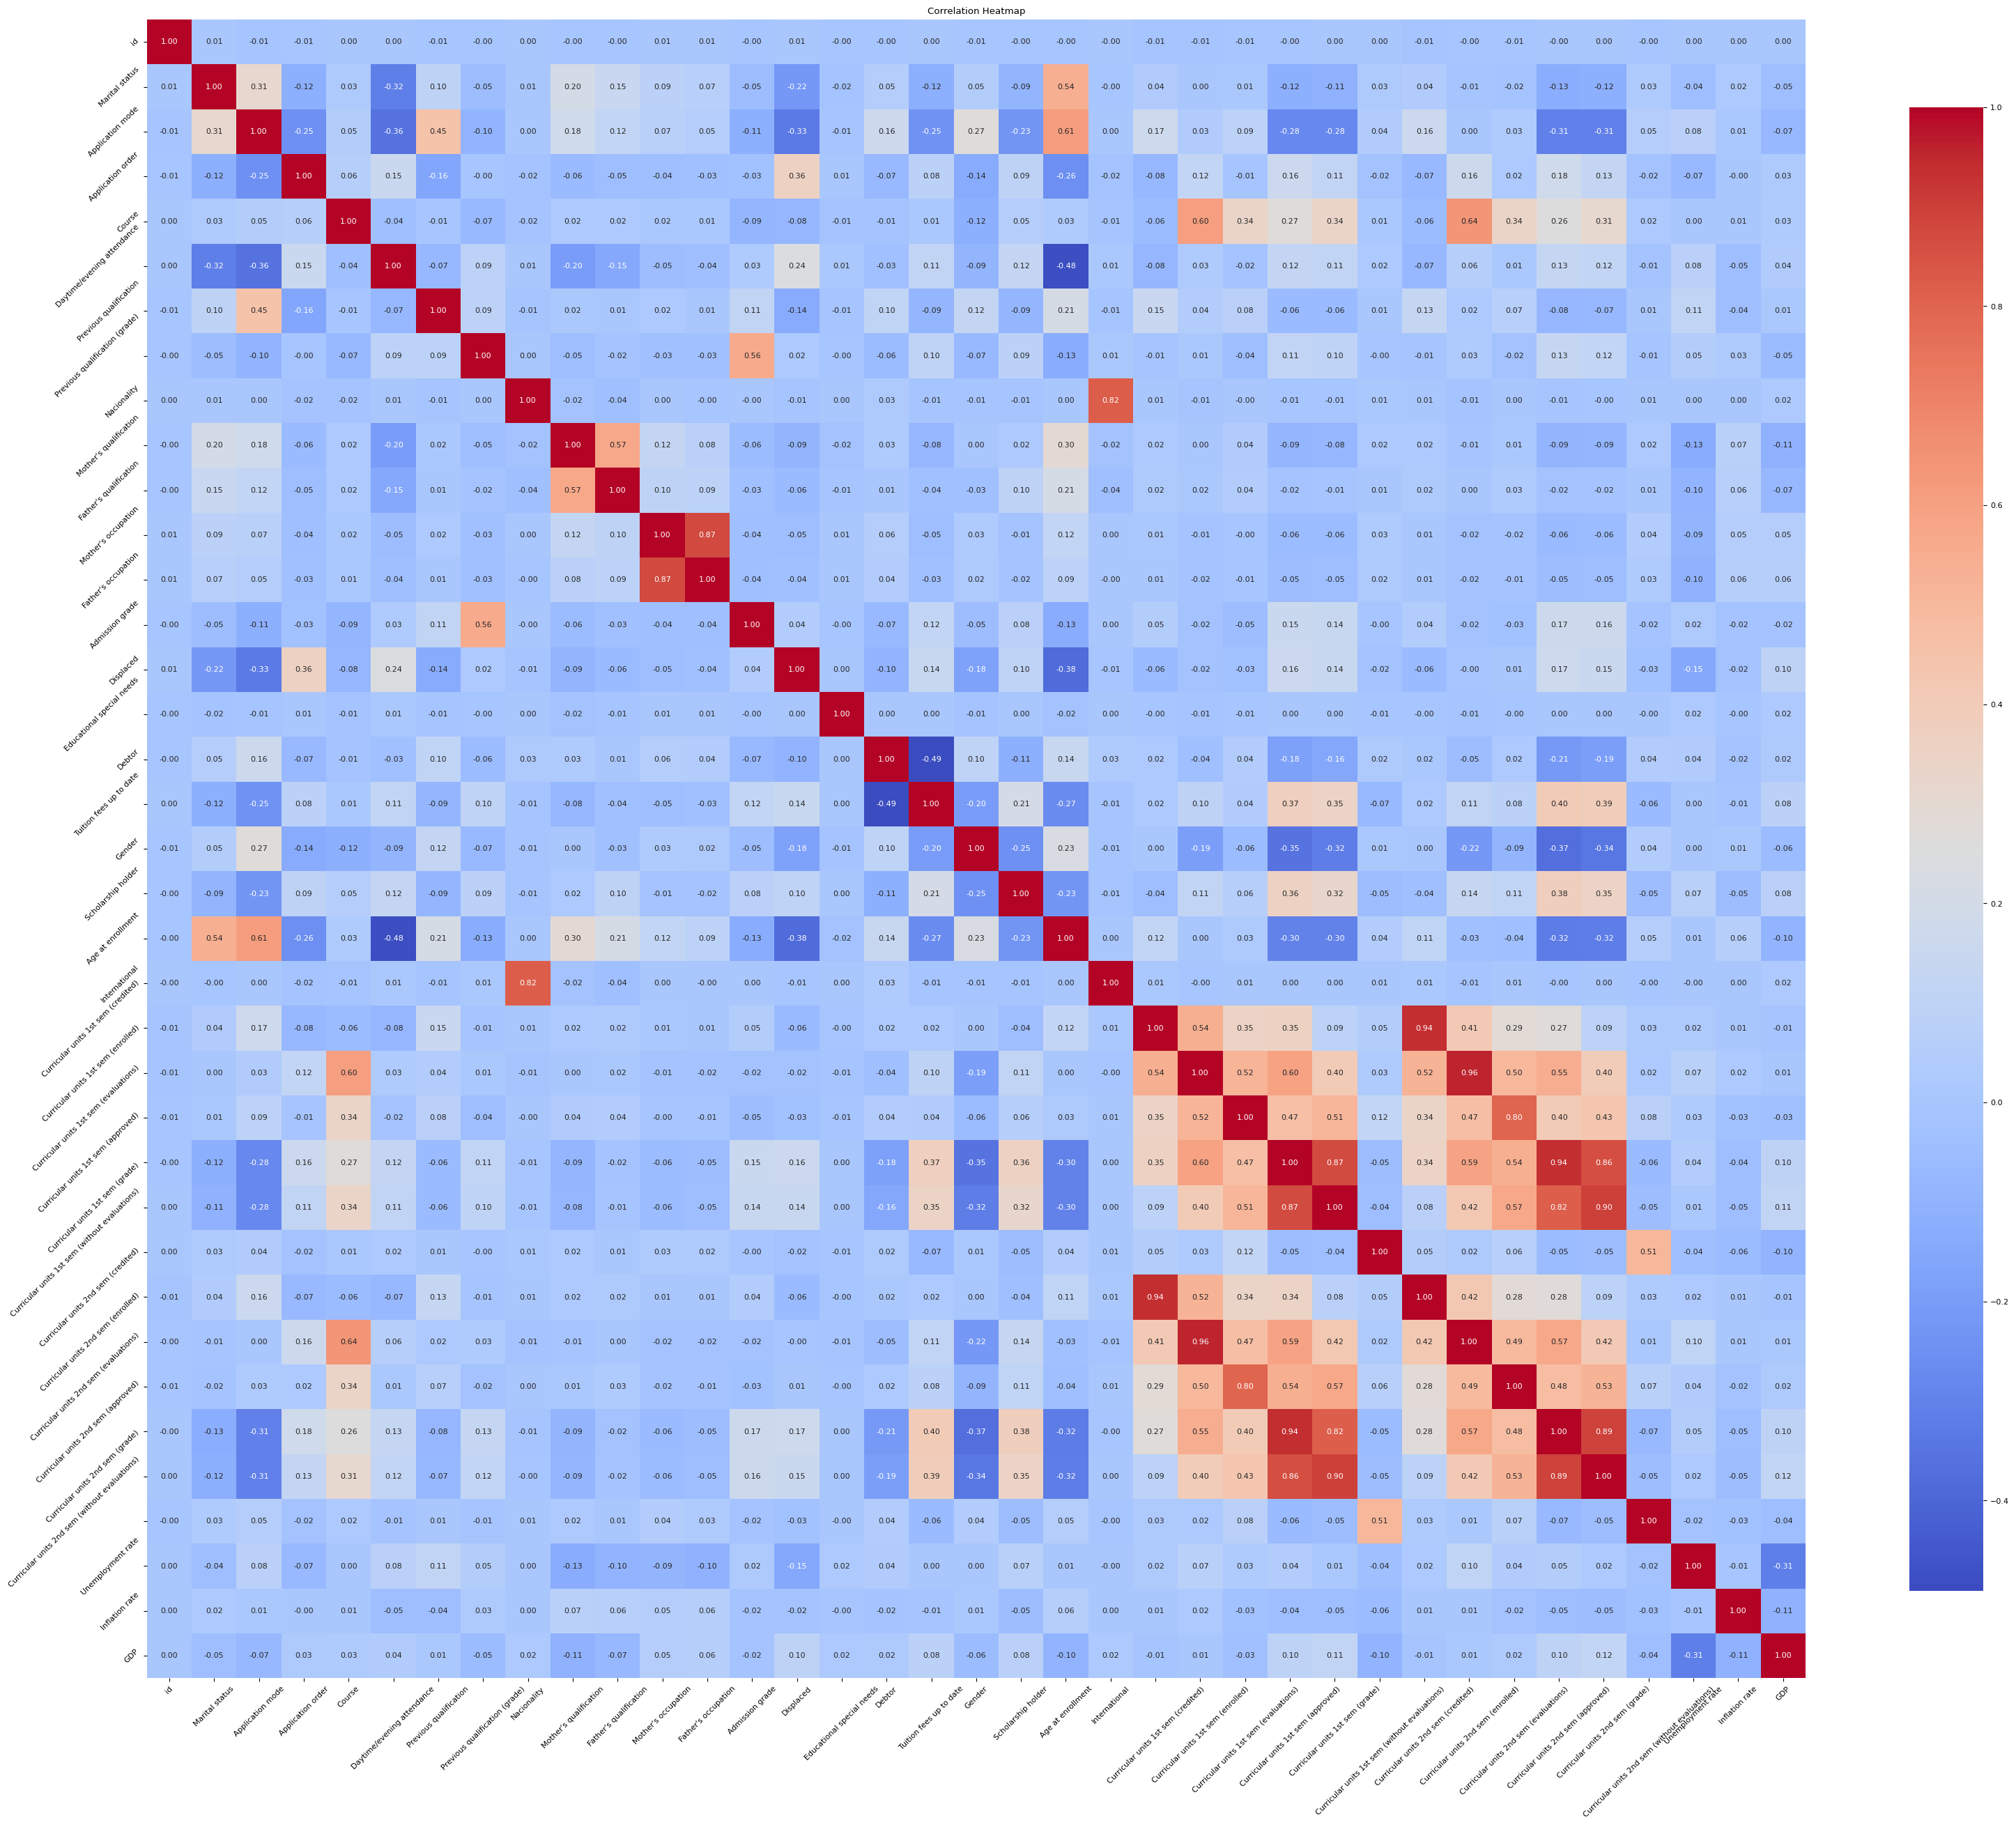

In [150]:
# Set the size of the heatmap
plt.figure(figsize=(32, 28))

# Create a heatmap
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Show the plot
plt.show()

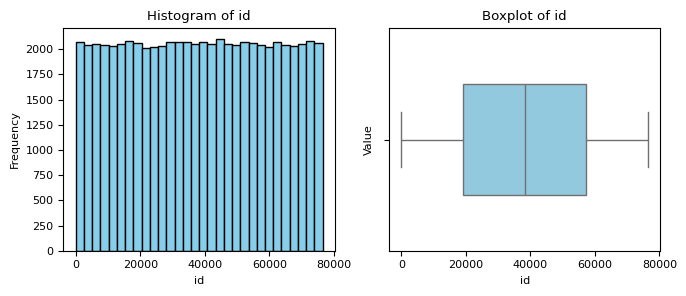

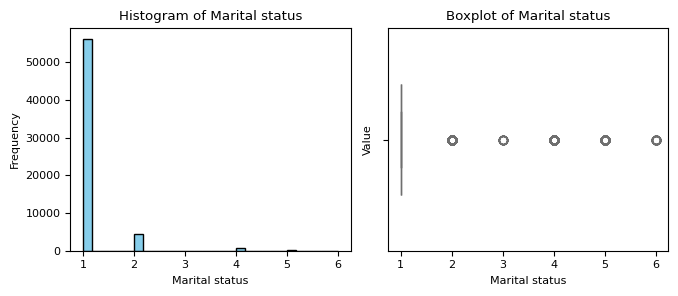

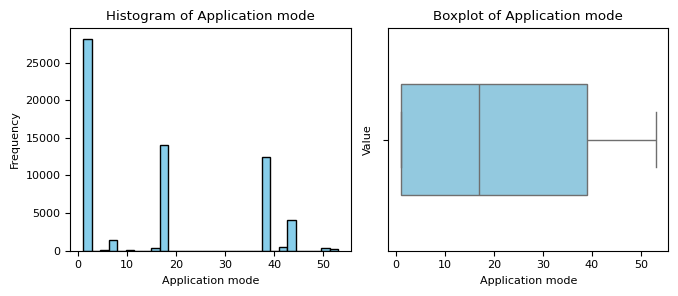

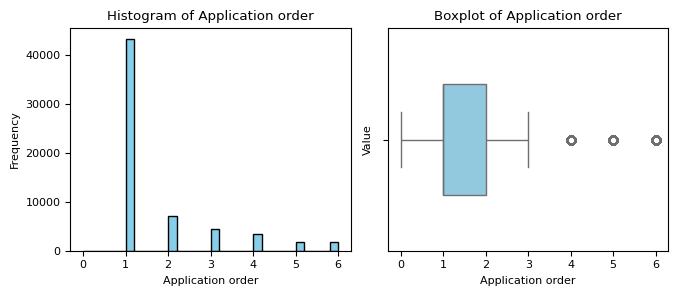

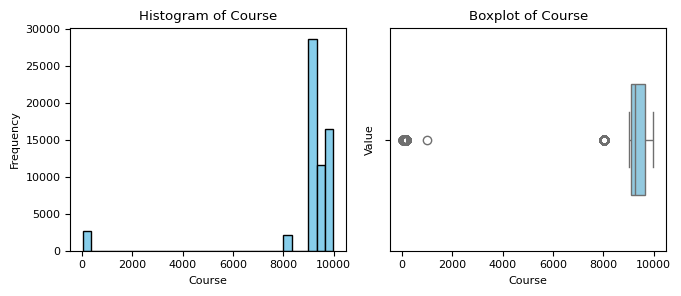

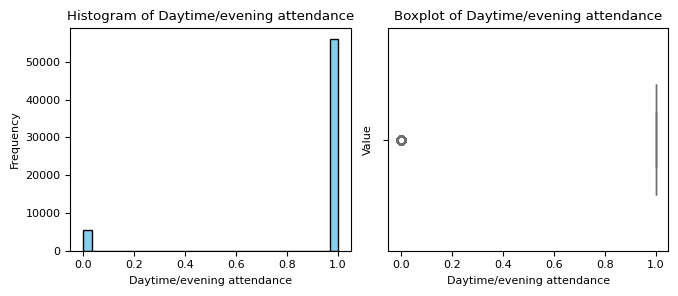

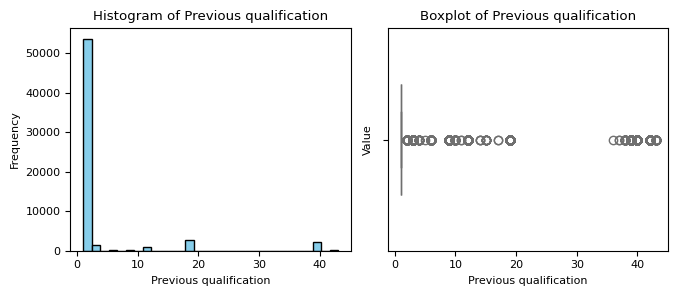

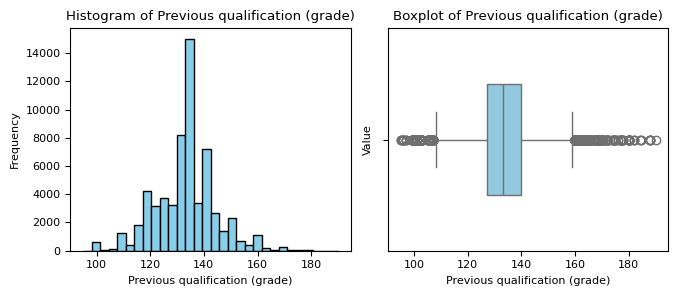

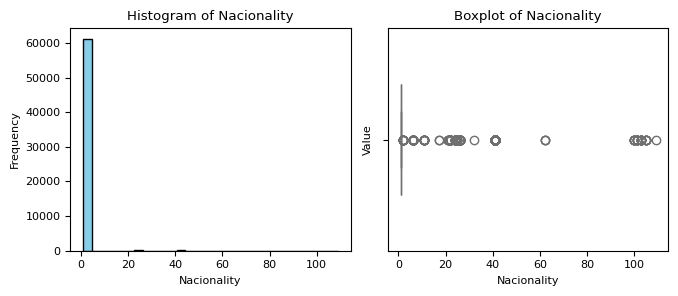

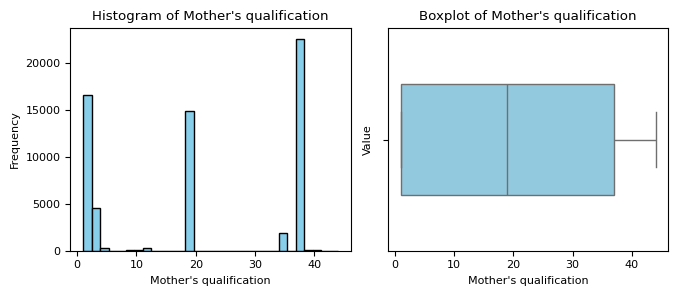

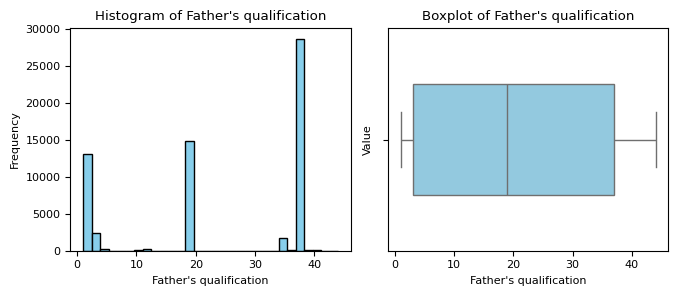

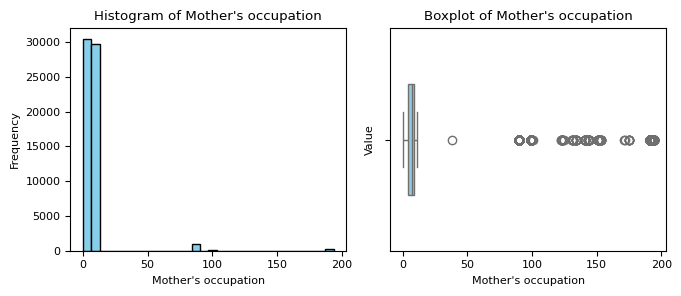

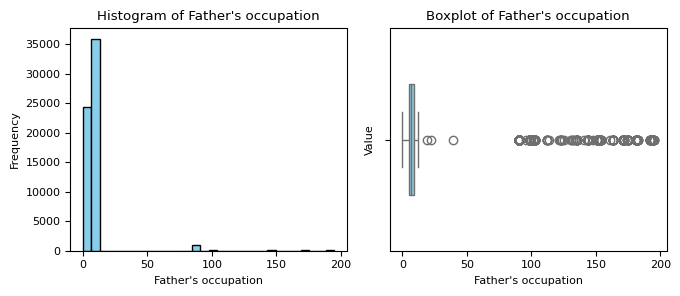

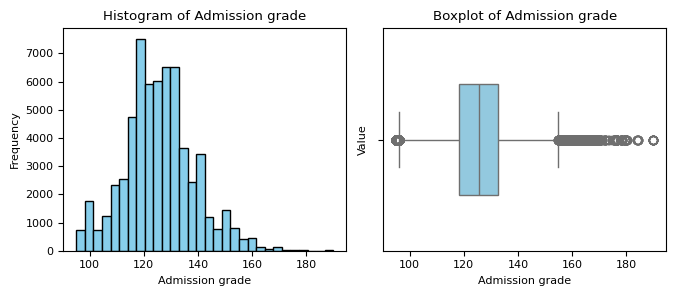

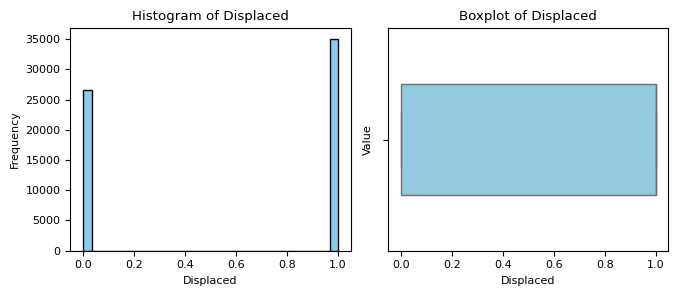

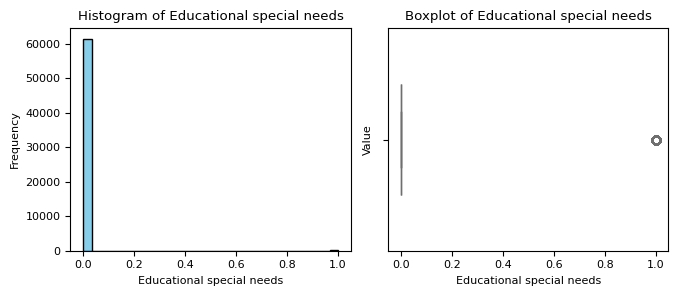

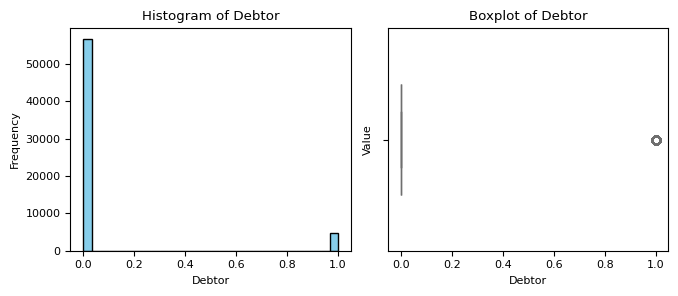

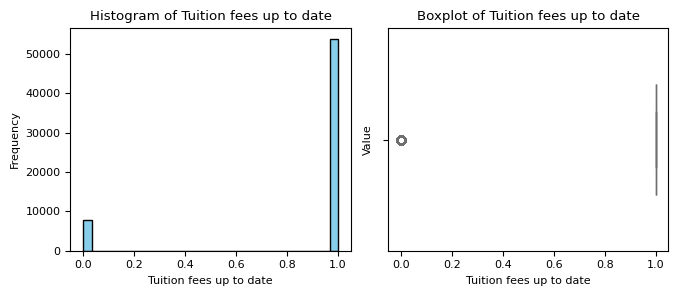

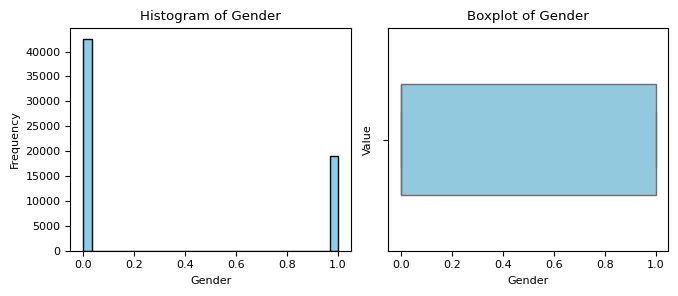

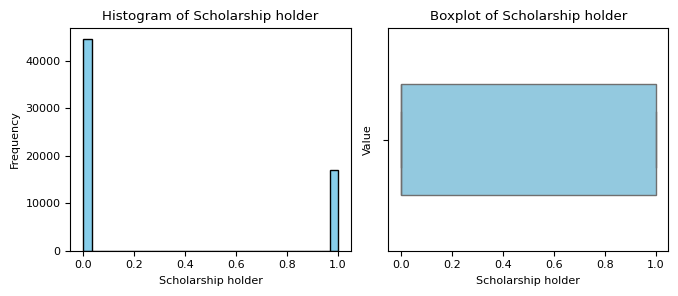

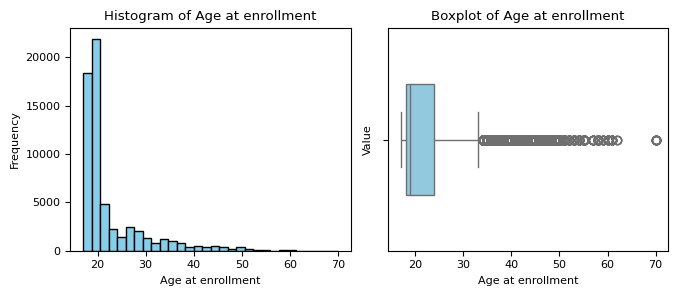

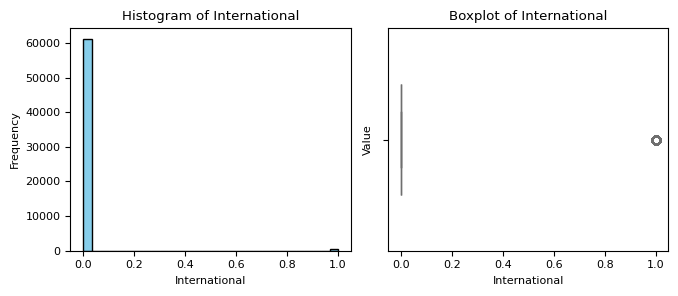

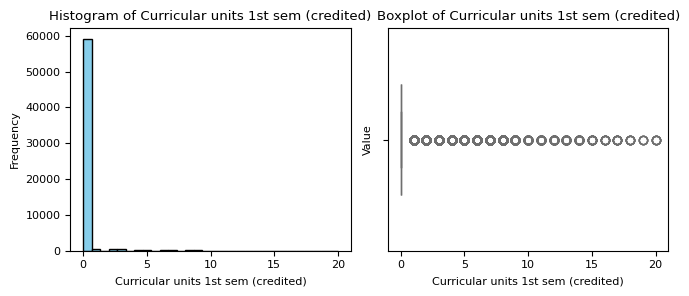

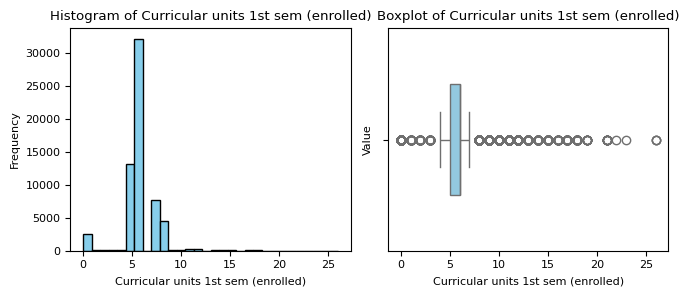

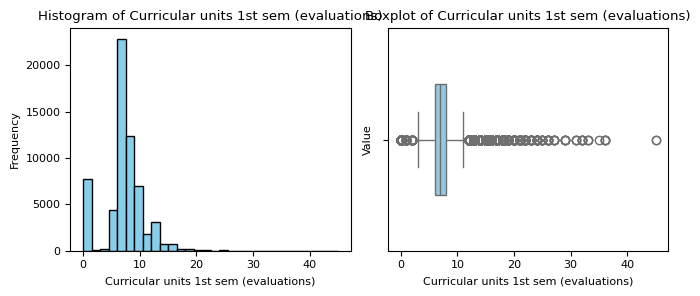

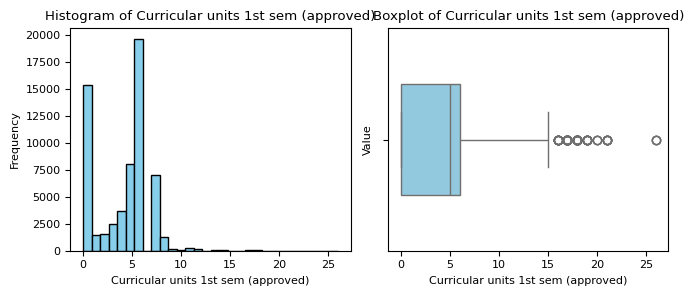

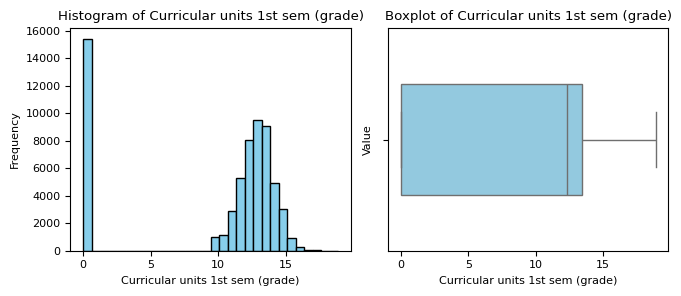

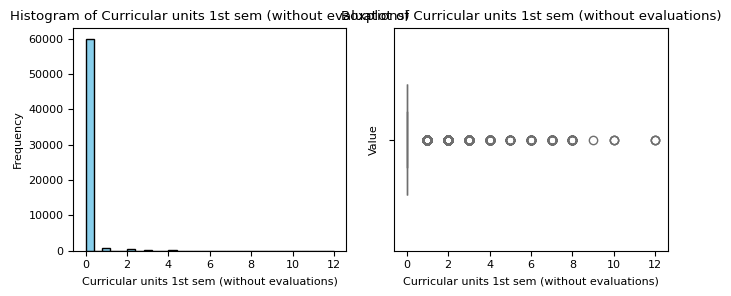

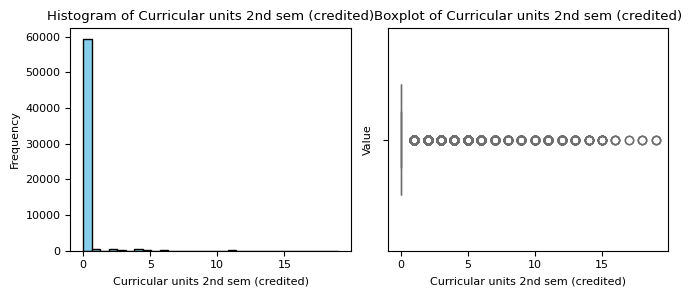

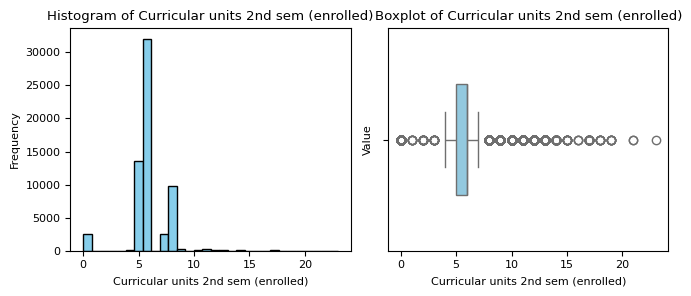

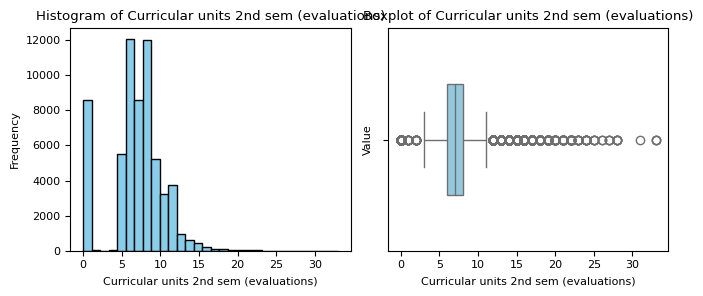

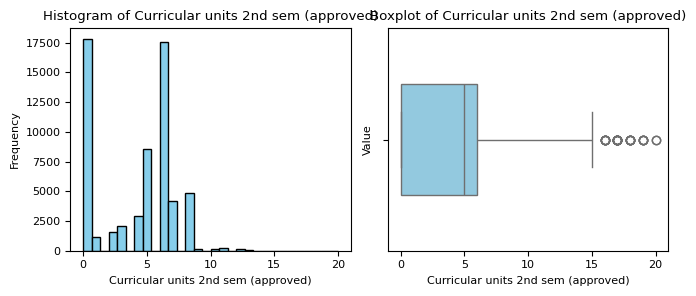

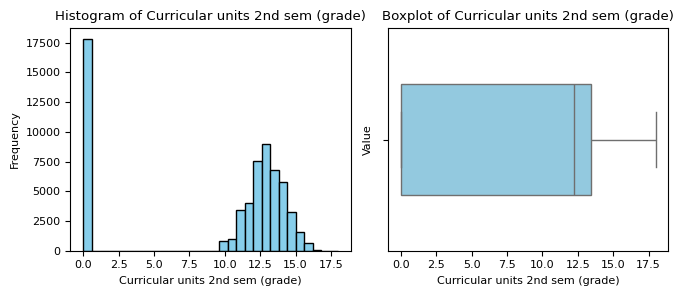

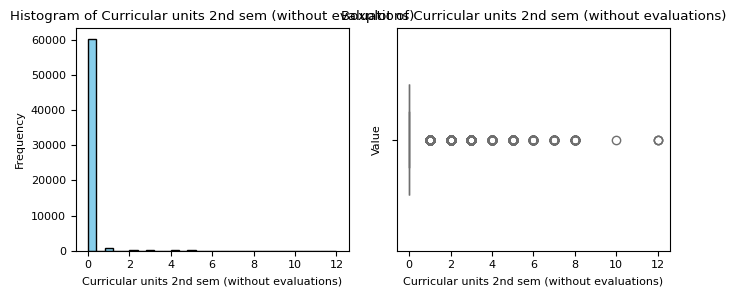

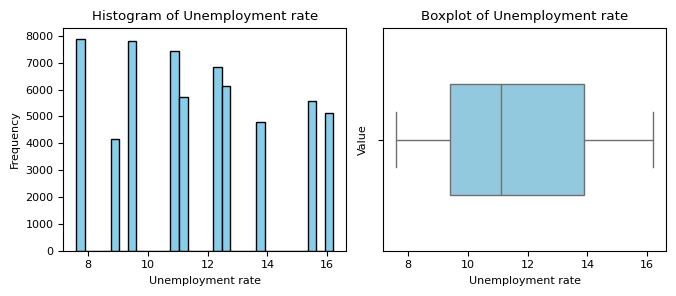

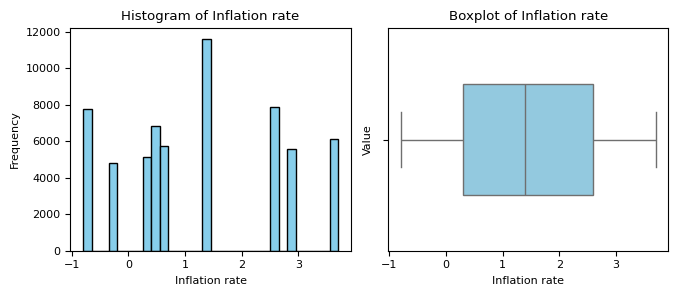

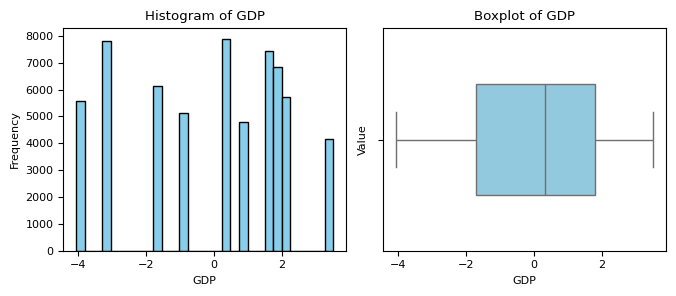

In [151]:
# Loop through each column in numerical_data
for col in numerical_data[1:]:
    # Set the figure size for the plots
    plt.figure(figsize=(10, 3))

    # ---------- Histogram ----------
    # Create the first subplot (1 row, 3 columns, position 1)
    plt.subplot(1, 3, 1)
    # Plot a histogram for the current column
    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    # Set the x-axis label
    plt.xlabel(col)
    # Set the y-axis label
    plt.ylabel('Frequency')
    # Set the title for the histogram
    plt.title(f'Histogram of {col}')

    # ---------- Boxplot ----------
    # Create the second subplot (1 row, 3 columns, position 2)
    plt.subplot(1, 3, 2)
    # Plot a boxplot for the current column
    sns.boxplot(x=df[col], color='skyblue', width=0.5)
    # Set the x-axis label
    plt.xlabel(col)
    # Set the y-axis label
    plt.ylabel('Value')
    # Set the title for the boxplot
    plt.title(f'Boxplot of {col}')

    # ---------- Final Adjustments ----------
    # Adjust the layout of the subplots for better visibility
    plt.tight_layout()
    # Display the plots
    plt.show()


Text(0.5, 1.0, 'Proportion of the Labels')

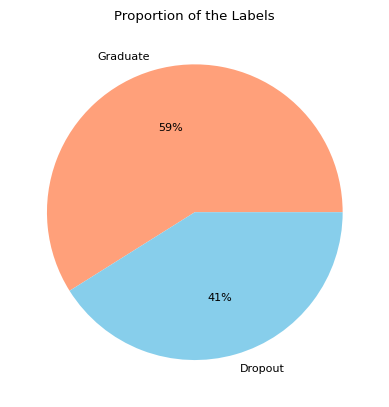

In [152]:
# Get the unique labels (categories) from the 'Target' column and count how many times each label occurs.
labels = df['Target'].value_counts().index

# Get the count (frequency) of each label in the 'Target' column.
values = df['Target'].value_counts().values

# Create a pie chart using the values and labels
plt.pie(values, labels = labels, colors = ['lightsalmon', 'skyblue'], autopct = '%1.0f%%')
plt.title('Proportion of the Labels')


In [153]:
# Target by Marital Status

import plotly.express as px

# - 'Marital status' is the column on the x-axis
# - 'Target' is the column that will define the color of the bars
fig = px.histogram(df, x='Marital status', color='Target', barmode='group', nbins=10, title='Target by Marital Status')

# Update the labels for the x-axis and y-axis for better clarity
fig.update_layout(xaxis_title='Marital Status', yaxis_title='Count', width=1000,height=500)

# Show the figure (this will render the interactive plot)
fig.show()


In [154]:
# Target by Curricular units 1st sem (grade)
fig = px.histogram(df, x='Curricular units 1st sem (grade)', color='Target', barmode='group', nbins=20, title='Target by 1st Sem Grades')
fig.update_layout(xaxis_title='Curricular Units 1st Sem (Grade)', yaxis_title='Count', width=1000,height=500)

fig.show()

In [155]:
# Target by Previous qualification
fig = px.histogram(df, x='Previous qualification', color='Target', barmode='group', nbins=10, title='Target by Previous qualification')
fig.update_layout(xaxis_title='Previous qualification', yaxis_title='Count', width=1000,height=500)

fig.show()

In [156]:
# Target by Gender
fig = px.histogram(df, x='Gender', color='Target', barmode='group', nbins=5, title='Dropout by Gender')
fig.update_layout(xaxis_title='Gender', yaxis_title='Count', width=1000,height=500)

fig.show()

In [157]:
# Target by Scholarship holder
fig = px.histogram(df, x='Scholarship holder', color='Target', barmode='group', nbins=10, title='Dropout by Scholarship holder')
fig.update_layout(xaxis_title='Scholarship holder', yaxis_title='Count', width=1000,height=500)

fig.show()

# Step 3: Encoding Categorical Variables

In [158]:
df = df.dropna(subset=['Target'])

In [159]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print each categorical column and its unique values
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("-" * 50)

Column: Target
Unique Values: ['Graduate' 'Dropout']
--------------------------------------------------


In [160]:
# Encoding the Target Column:

from sklearn.preprocessing import OrdinalEncoder

# Apply OrdinalEncoder to 'Target' column
df['Target'] = OrdinalEncoder(categories=[['Dropout', 'Graduate']]).fit_transform(df[['Target']])


The categories are defined as ['Dropout', 'Graduate'], which will be mapped to integers (e.g., Dropout → 0, Graduate → 1).

# **Step 4 : Feature Selection**

In [161]:
# Mapping qualifications

unique_values = set(df['Previous qualification'].unique().tolist() +
                    df["Mother's qualification"].unique().tolist() +
                    df["Father's qualification"].unique().tolist())

# Create the mapping (mapping unique qualifications to an index)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}

# Apply the mapping to the relevant columns
df['Previous qualification'] = df['Previous qualification'].map(value_to_index)
df["Mother's qualification"] = df["Mother's qualification"].map(value_to_index)
df["Father's qualification"] = df["Father's qualification"].map(value_to_index)


* Goal: This part of the code is mapping categorical values from the Previous qualification, Mother's qualification, and Father's qualification columns into numerical values (indices).

* How:
  * Combine all unique values from the three columns and create a set (to remove duplicates).
  * Then, for each unique qualification, map it to a unique index using enumerate() and store this mapping in the dictionary value_to_index.
  * The map() function is then applied to the columns, converting the categorical qualifications into numerical indices.

In [162]:
# Mapping occupations

unique_values = set(df["Mother's occupation"].unique().tolist() +
                    df["Father's occupation"].unique().tolist())

# Create the mapping (mapping unique occupations to an index)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}

# Apply the mapping to the relevant columns
df["Mother's occupation"] = df["Mother's occupation"].map(value_to_index)
df["Father's occupation"] = df["Father's occupation"].map(value_to_index)


* Goal: Similar to qualifications, this part maps categorical values from the Mother's occupation and Father's occupation columns into numerical indices.
* How:
  * Combines unique values from both columns and creates a set of unique occupations.
  * Maps these unique values to a numerical index and applies the mapping to the columns using map().

**Column Reduction:**

* Goal: This part cleans the data by:
Dropping columns that are considered irrelevant (Nacionality, International, Educational special needs).

* Creating a new feature, I/U Ratio, by dividing Inflation rate by Unemployment rate.
* Dropping the original Inflation rate and Unemployment rate columns after creating the new ratio column.

In [163]:
# Drop irrelevant columns
df = df.drop(['Nacionality', 'International', 'Educational special needs'], axis=1)

# Create a new column 'I/U Ratio' by dividing 'Inflation rate' by 'Unemployment rate'
df['I/U Ratio'] = df['Inflation rate'] / df['Unemployment rate']

# Drop the original 'Inflation rate' and 'Unemployment rate' columns
df.drop(columns=['Inflation rate', 'Unemployment rate'], inplace=True)


**Creating Averages for Curricular Unit Data:**

The following lines of code create new columns in the df DataFrame by computing the averages for different curricular unit-related data between the 1st and 2nd semesters:

* For each pair of columns (e.g., "Curricular units 1st sem (credited)" and "Curricular units 2nd sem (credited)"), the .mean(axis=1) function calculates the average of the two values row-wise (across columns in the same row).

* This operation computes the mean for the respective curricular unit data for the first and second semesters, and stores the result in a new column for each category.

In [164]:
df['Curricular units avg credited'] = df[['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']].mean(axis=1)
df['Curricular avg enrolled'] = df[['Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']].mean(axis=1)
df['Curricular avg evaluations'] = df[['Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)']].mean(axis=1)
df['Curricular avg approved'] = df[['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']].mean(axis=1)
df['Curricular avg grade'] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)
df['Curricular avg without evaluations'] = df[['Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)']].mean(axis=1)


** Selecting Relevant Numerical Features:**

The columns selected include:
* Demographic and curricular features: Age at enrollment, average curricular unit data from both semesters, and the I/U Ratio.
* Economic indicators: GDP.
* Target variable: Target.

In [165]:
num_features = df[['Age at enrollment', 'Curricular units avg credited', 'Curricular avg enrolled',
                   'Curricular avg evaluations', 'Curricular avg approved',
                   'Curricular avg grade', 'Curricular avg without evaluations', 'I/U Ratio',
                   'GDP', 'Target']]


<Axes: >

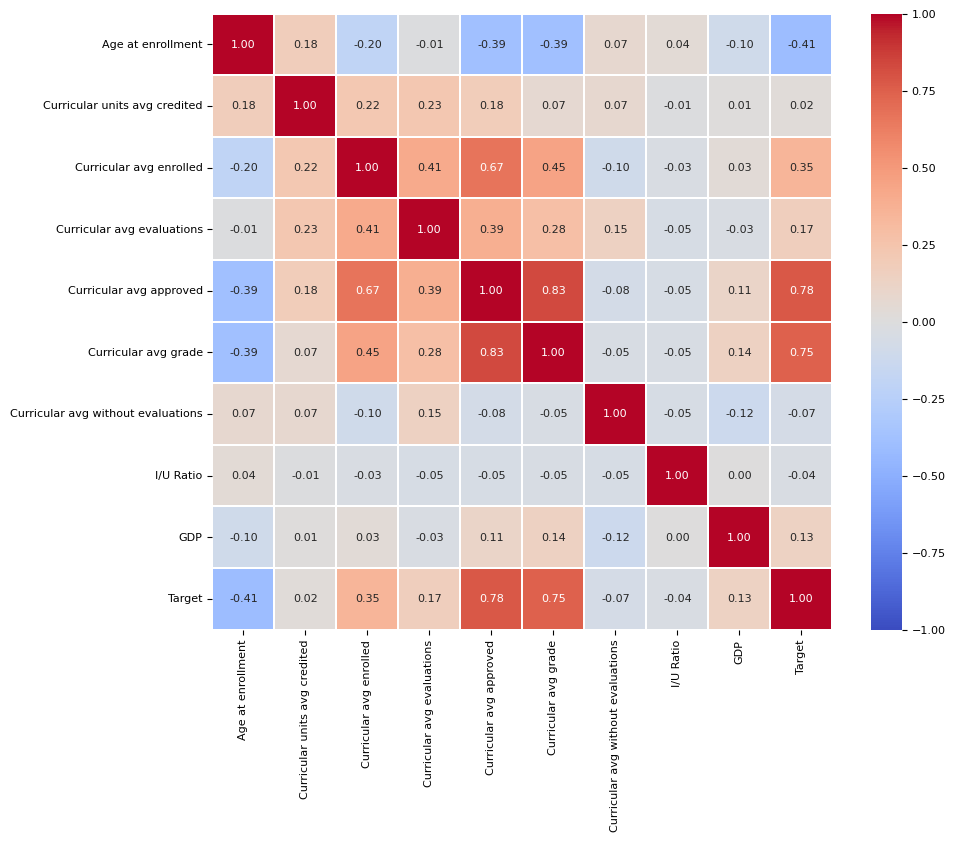

In [166]:
plt.figure(figsize=(10, 8))  # Set figure size for the heatmap
plt.rcParams.update({'font.size': 8})  # Update font size for better readability

# Create and plot the heatmap
sns.heatmap(num_features.corr(method='spearman'), vmin=-1, vmax=1, center=0,
            cmap='coolwarm', fmt='.2f', linewidths=.2, annot=True)



[Text(0, 0, 'Drop Out'), Text(2, 0, 'Graduate')]

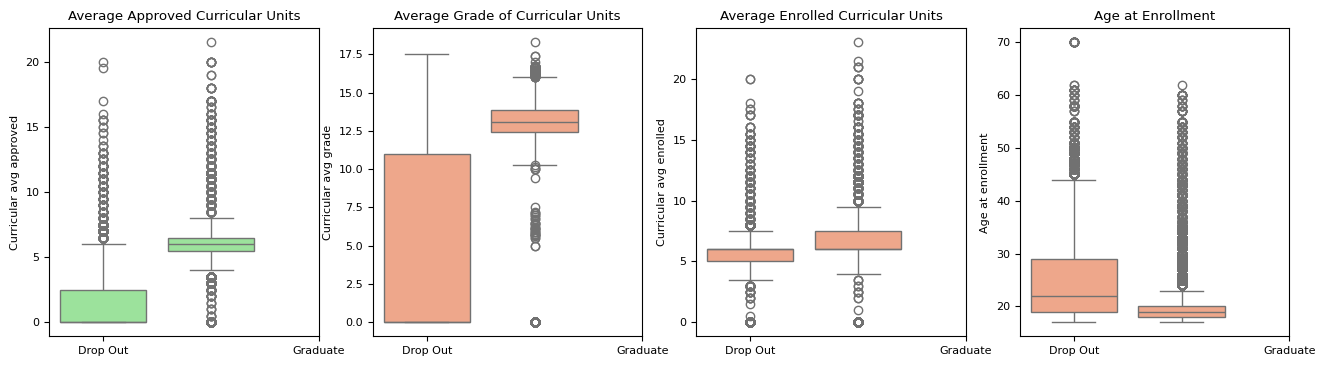

In [167]:
# Create a 1x4 grid of subplots with a size of 16x4 inches
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# 1. First Boxplot: Average Approved Curricular Units vs Target
sns.boxplot(data=df, x='Target', y='Curricular avg approved', color='lightgreen', ax=ax1)
ax1.set_title('Average Approved Curricular Units')  # Set the title for this subplot
ax1.set_xlabel("")  # Remove the x-axis label
ax1.set_xticks([0, 2])  # Set the x-axis ticks for the Target values (Drop Out, Graduate)
ax1.set_xticklabels(['Drop Out', 'Graduate'])  # Label the x-axis ticks

# 2. Second Boxplot: Average Grade of Curricular Units vs Target
sns.boxplot(data=df, x='Target', y='Curricular avg grade', color='lightsalmon', ax=ax2)
ax2.set_title('Average Grade of Curricular Units')  # Set the title for this subplot
ax2.set_xlabel("")  # Remove the x-axis label
ax2.set_xticks([0, 2])  # Set the x-axis ticks for the Target values (Drop Out, Graduate)
ax2.set_xticklabels(['Drop Out', 'Graduate'])  # Label the x-axis ticks

# 3. Third Boxplot: Average Enrolled Curricular Units vs Target
sns.boxplot(data=df, x='Target', y='Curricular avg enrolled', color='lightsalmon', ax=ax3)
ax3.set_title('Average Enrolled Curricular Units')  # Set the title for this subplot
ax3.set_xlabel("")  # Remove the x-axis label
ax3.set_xticks([0, 2])  # Set the x-axis ticks for the Target values (Drop Out, Graduate)
ax3.set_xticklabels(['Drop Out', 'Graduate'])  # Label the x-axis ticks

# 4. Fourth Boxplot: Age at Enrollment vs Target
sns.boxplot(data=df, x='Target', y='Age at enrollment', color='lightsalmon', ax=ax4)
ax4.set_title('Age at Enrollment')  # Set the title for this subplot
ax4.set_xlabel("")  # Remove the x-axis label
ax4.set_xticks([0, 2])  # Set the x-axis ticks for the Target values (Drop Out, Graduate)
ax4.set_xticklabels(['Drop Out', 'Graduate'])  # Label the x-axis ticks


In [168]:
# Outlier Removal: Remove rows where drop-out students have 0 credits
# 1. Remove rows where 'Curricular avg approved' is 0 for drop-out students (Target == 0)
df = df.drop(df.loc[(df['Curricular avg approved'] == 0) & (df['Target'] == 0)].index)

# 2. Remove rows where 'Curricular avg enrolled' is 0 for drop-out students (Target == 0)
df = df.drop(df.loc[(df['Curricular avg enrolled'] == 0) & (df['Target'] == 0)].index)

# 3. Remove rows where 'Curricular avg grade' is 0 for drop-out students (Target == 0)
df = df.drop(df.loc[(df['Curricular avg grade'] == 0) & (df['Target'] == 0)].index)


In [169]:
# Skewness Handling
skewed_features = {}  # Dictionary to store skewness of each feature
skewed_columns = []   # List to store features that are right-skewed

# Loop through each feature in the DataFrame
for feature in df.columns:
    skewness = df[feature].skew()  # Calculate the skewness of the feature
    skewed_features[feature] = skewness  # Store the skewness of the feature
    if skewness > 0.5:  # Check if the feature is right-skewed
        print(f"{feature} is right skewed with skewness: {skewness}")  # Print the skewed feature

# Loop through each feature again to apply log transformation on right-skewed features
for feature in df.columns:
    if skewed_features[feature] > 0.5:  # Check if the feature is right-skewed
        skewed_columns.append(feature)  # Add the skewed feature to the list
        df[feature] = np.log1p(df[feature])  # Apply log transformation to the feature

print("Log transformation applied to right-skewed features.")  # Print a message indicating that log transformation is applied


Marital status is right skewed with skewness: 5.887036372249455
Application mode is right skewed with skewness: 0.8825970581158198
Application order is right skewed with skewness: 1.829068340179598
Previous qualification is right skewed with skewness: 3.69180078914034
Mother's occupation is right skewed with skewness: 4.956006646236447
Father's occupation is right skewed with skewness: 5.073616935866192
Debtor is right skewed with skewness: 3.8275207075452125
Gender is right skewed with skewness: 1.252738997971902
Scholarship holder is right skewed with skewness: 0.6251653155392952
Age at enrollment is right skewed with skewness: 2.849319195890955
Curricular units 1st sem (credited) is right skewed with skewness: 6.978963827065663
Curricular units 1st sem (enrolled) is right skewed with skewness: 2.2590732549590564
Curricular units 1st sem (evaluations) is right skewed with skewness: 1.8324143623084015
Curricular units 1st sem (without evaluations) is right skewed with skewness: 12.059

# Step 5 : Cross-Validation Implementation & Model Implementation

In [170]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [171]:
# Initialize Results
Conclusions = []
Conclusions.append(['Model Name', 'Train', 'Validation', 'Test'])

In [172]:
# Define evaluation function
def Evaluate(model_name, y_train_pred, y_val_pred, y_test_pred):
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Accuracy Scores
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")

    # Classification Reports
    print("="*100)
    print("Classification Report for Train Set:\n", classification_report(y_train, y_train_pred, zero_division=0))
    print("="*100)
    print("Classification Report for Validation Set:\n", classification_report(y_val, y_val_pred, zero_division=0))
    print("="*100)
    print("Classification Report for Test Set:\n", classification_report(y_test, y_test_pred, zero_division=0))

    return [model_name, accuracy_train, accuracy_val, accuracy_test]

In [173]:
# Splitting and Scaling
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [174]:
# Decision Tree
print("\n\n=== Decision Tree ===")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

Conclusions.append(Evaluate("Decision Tree", y_train_pred, y_val_pred, y_test_pred))



=== Decision Tree ===
Train Accuracy: 1.0
Validation Accuracy: 0.8904964539007092
Test Accuracy: 0.8924822695035461
Classification Report for Train Set:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7400
         1.0       1.00      1.00      1.00     25497

    accuracy                           1.00     32897
   macro avg       1.00      1.00      1.00     32897
weighted avg       1.00      1.00      1.00     32897

Classification Report for Validation Set:
               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      1669
         1.0       0.93      0.93      0.93      5381

    accuracy                           0.89      7050
   macro avg       0.85      0.85      0.85      7050
weighted avg       0.89      0.89      0.89      7050

Classification Report for Test Set:
               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      1646
 

In [175]:
# Naïve Bayes
print("\n\n=== Naïve Bayes ===")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_val_pred = nb_model.predict(X_val)
y_test_pred = nb_model.predict(X_test)

Conclusions.append(Evaluate("Naïve Bayes", y_train_pred, y_val_pred, y_test_pred))



=== Naïve Bayes ===
Train Accuracy: 0.8727847524090343
Validation Accuracy: 0.8678014184397164
Test Accuracy: 0.8736170212765958
Classification Report for Train Set:
               precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      7400
         1.0       0.92      0.91      0.92     25497

    accuracy                           0.87     32897
   macro avg       0.82      0.82      0.82     32897
weighted avg       0.87      0.87      0.87     32897

Classification Report for Validation Set:
               precision    recall  f1-score   support

         0.0       0.72      0.73      0.72      1669
         1.0       0.92      0.91      0.91      5381

    accuracy                           0.87      7050
   macro avg       0.82      0.82      0.82      7050
weighted avg       0.87      0.87      0.87      7050

Classification Report for Test Set:
               precision    recall  f1-score   support

         0.0       0.72      0.74      0.7

In [176]:
# Random Forest
print("\n\n=== Random Forest ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

Conclusions.append(Evaluate("Random Forest", y_train_pred, y_val_pred, y_test_pred))




=== Random Forest ===
Train Accuracy: 1.0
Validation Accuracy: 0.9382978723404255
Test Accuracy: 0.9353191489361702
Classification Report for Train Set:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7400
         1.0       1.00      1.00      1.00     25497

    accuracy                           1.00     32897
   macro avg       1.00      1.00      1.00     32897
weighted avg       1.00      1.00      1.00     32897

Classification Report for Validation Set:
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      1669
         1.0       0.94      0.99      0.96      5381

    accuracy                           0.94      7050
   macro avg       0.94      0.89      0.91      7050
weighted avg       0.94      0.94      0.94      7050

Classification Report for Test Set:
               precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      1646
 

In [177]:
# SVM
print("\n\n=== SVM ===")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

Conclusions.append(Evaluate("SVM", y_train_pred, y_val_pred, y_test_pred))




=== SVM ===
Train Accuracy: 0.9349788734535064
Validation Accuracy: 0.9324822695035461
Test Accuracy: 0.9358865248226951
Classification Report for Train Set:
               precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      7400
         1.0       0.94      0.98      0.96     25497

    accuracy                           0.93     32897
   macro avg       0.93      0.88      0.90     32897
weighted avg       0.93      0.93      0.93     32897

Classification Report for Validation Set:
               precision    recall  f1-score   support

         0.0       0.93      0.77      0.84      1669
         1.0       0.93      0.98      0.96      5381

    accuracy                           0.93      7050
   macro avg       0.93      0.88      0.90      7050
weighted avg       0.93      0.93      0.93      7050

Classification Report for Test Set:
               precision    recall  f1-score   support

         0.0       0.94      0.78      0.85      1

In [178]:
# KNN
print("\n\n=== KNN ===")
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

Conclusions.append(Evaluate("KNN", y_train_pred, y_val_pred, y_test_pred))





=== KNN ===
Train Accuracy: 0.9296288415357024
Validation Accuracy: 0.918581560283688
Test Accuracy: 0.92
Classification Report for Train Set:
               precision    recall  f1-score   support

         0.0       0.94      0.73      0.82      7400
         1.0       0.93      0.99      0.96     25497

    accuracy                           0.93     32897
   macro avg       0.93      0.86      0.89     32897
weighted avg       0.93      0.93      0.93     32897

Classification Report for Validation Set:
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.80      1669
         1.0       0.92      0.98      0.95      5381

    accuracy                           0.92      7050
   macro avg       0.92      0.85      0.88      7050
weighted avg       0.92      0.92      0.91      7050

Classification Report for Test Set:
               precision    recall  f1-score   support

         0.0       0.94      0.70      0.80      1646
         1.

In [179]:
# Print final results
print("\n\n=== Summary of Results ===")
for result in Conclusions:
    print(result)



=== Summary of Results ===
['Model Name', 'Train', 'Validation', 'Test']
['Decision Tree', 1.0, 0.8904964539007092, 0.8924822695035461]
['Naïve Bayes', 0.8727847524090343, 0.8678014184397164, 0.8736170212765958]
['Random Forest', 1.0, 0.9382978723404255, 0.9353191489361702]
['SVM', 0.9349788734535064, 0.9324822695035461, 0.9358865248226951]
['KNN', 0.9296288415357024, 0.918581560283688, 0.92]


In [180]:
results_df = pd.DataFrame(Conclusions[1:], columns=Conclusions[0])

print("\n\n=== Summary of Results ===")
print(results_df.to_string(index=False))



=== Summary of Results ===
   Model Name    Train  Validation     Test
Decision Tree 1.000000    0.890496 0.892482
  Naïve Bayes 0.872785    0.867801 0.873617
Random Forest 1.000000    0.938298 0.935319
          SVM 0.934979    0.932482 0.935887
          KNN 0.929629    0.918582 0.920000


**Observations:**

* Random Forest:
Excellent performance on the Validation (0.94) and Test (0.94) sets.
Perfect on Train, but this might indicate overfitting.

* SVM:
Balanced performance across Train (0.93), Validation (0.93), and Test (0.94) sets.
Slightly better generalization compared to Random Forest, considering it doesn't overfit as much on Train.

* Decision Tree:
Overfits significantly (Train: 1.00) and performs slightly worse on Validation and Test (0.89 each).

* Naïve Bayes:
Consistent performance but lags behind others, especially Random Forest and SVM.

* KNN:
Strong performance but slightly lower than Random Forest and SVM.

=> Conclusion:
Best Model: SVM and Random Forest both perform well, but SVM might edge ahead due to better generalization and less overfitting.


# Bar Plot for Model Comparison (Train, Validation, and Test Accuracy)

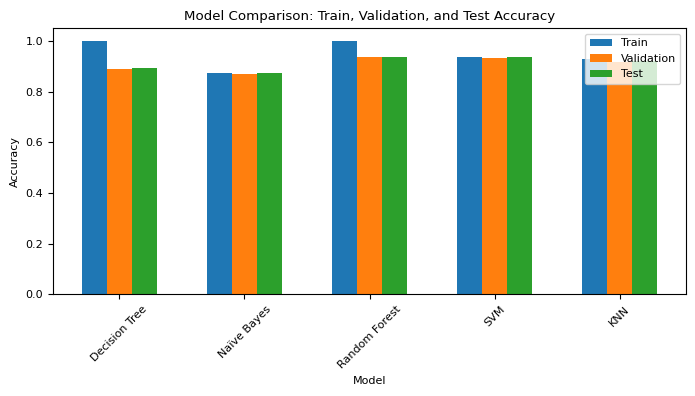

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the 'Conclusions' list
model_names = ['Decision Tree', 'Naïve Bayes', 'Random Forest', 'SVM', 'KNN']
train_accuracies = [1.0, 0.872785, 1.0, 0.934979, 0.929629]
validation_accuracies = [0.890496, 0.867801, 0.938298, 0.932482, 0.918582]
test_accuracies = [0.892482, 0.873617, 0.935319, 0.935887, 0.92]

# Set positions for each bar
x = np.arange(len(model_names))
width = 0.2  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

bars1 = ax.bar(x - width, train_accuracies, width, label='Train')
bars2 = ax.bar(x, validation_accuracies, width, label='Validation')
bars3 = ax.bar(x + width, test_accuracies, width, label='Test')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison: Train, Validation, and Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Line Plot for Accuracy Comparison Across Datasets
 This line plot visualize how each model performs across the three sets (Train, Validation, and Test) over different models.

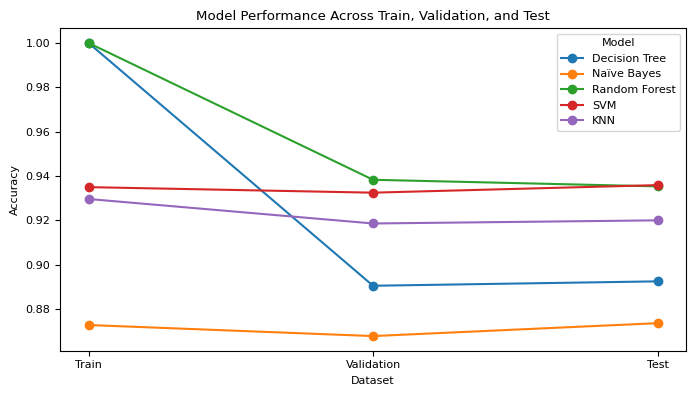

In [182]:
# Plotting the line plot to compare accuracy across Train, Validation, and Test for each model
plt.figure(figsize=(7, 4))

# Loop through the model names and plot each model's accuracy
for i, model in enumerate(model_names):
    plt.plot(['Train', 'Validation', 'Test'],
             [train_accuracies[i], validation_accuracies[i], test_accuracies[i]],
             marker='o', label=model)

# Adding labels, title, and legend
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Performance Across Train, Validation, and Test')
plt.legend(title='Model')

# Show the plot
plt.tight_layout()
plt.show()
